<a href="https://colab.research.google.com/github/sana-hds/HDS-assignmenet/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Analyzing Consumer Shopping Behavior**:
- Insights from Demographics, Purchases, and Geospatial Trends

## **Introduction**

In this project, I aim to analyze customer shopping behavior by utilizing a dataset that includes valuable details about customer demographics, items purchased, payment methods, and more. By combining demographic, purchasing, and geographic data, I plan to identify patterns in consumer behavior, understand how different payment methods influence purchasing decisions, and explore how geographic factors like location and seasonality play a role in shopping trends. With this comprehensive approach, the project will provide insights into the interrelationships between various factors that influence consumer choices.

Additionally, I will explore the spatial dimension of shopping behavior using GeoJSON data to create geographical visualizations. These visualizations will map the purchasing patterns across different US states, allowing me to identify regional variations in customer behavior. By examining these trends through the lens of data visualization and statistical analysis, I aim to deliver a deeper understanding of the drivers of consumer behavior and provide actionable insights for businesses to enhance their marketing strategies.

**Datasets Used**


1. Customer Shopping Trends Dataset (from Kaggle):

* https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset?select=shopping_trends_updated.csv


* This dataset contains valuable information about customer purchasing behavior, including various attributes such as customer demographics, items purchased, payment methods, and more. It can be used for understanding shopping trends, segmenting customers, and analyzing purchasing patterns. You can explore correlations between different variables such as payment method, category, and customer profile.

2. HD Pulse Data (from NIMHD):

* https://hdpulse.nimhd.nih.gov/data-portal/social/table
* The HD Pulse Data provides insights into social and economic factors that can affect health outcomes. This dataset offers a range of social determinants of health data across different regions and populations. It's useful for exploring the relationship between social factors (like income, education, etc.) and health disparities, which can contribute to understanding the broader context of well-being and health interventions.

3. US States GeoJSON Data (from ERIC):

* https://eric.clst.org/tech/usgeojson/

* This dataset provides geographical boundaries of US states in GeoJSON format. It is typically used for creating visualizations such as choropleth maps, where geographic boundaries are essential to display spatial data like population, income levels, or other regional metrics. The dataset allows for visual exploration of US states and is ideal for geographic visualizations when combined with relevant socio-economic or demographic data.

In [60]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json

# **Load the datasets**

In [61]:
shopping_trends = pd.read_csv('shopping_trends_updated.csv')

In [62]:
Income_by_states = pd.read_json("Income by states.json")

In [63]:
with open('us-states geodata.json', 'r') as f:
    geojson = json.load(f)

# **Data transformations**

In [64]:
shopping_trends.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [65]:
shopping_trends.shape

(3900, 18)

In [66]:
shopping_trends.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [67]:
shopping_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [68]:
# Convert specified columns into category type
categorical_columns = [
    'Gender',
    'Category',
    'Size',
    'Color',
    'Season',
    'Subscription Status',
    'Shipping Type',
    'Discount Applied',
    'Promo Code Used',
    'Payment Method',
    'Frequency of Purchases'
]

# Apply category dtype to these columns
for col in categorical_columns:
    shopping_trends[col] = shopping_trends[col].astype('category')

# Verify the changes
print(shopping_trends.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Customer ID             3900 non-null   int64   
 1   Age                     3900 non-null   int64   
 2   Gender                  3900 non-null   category
 3   Item Purchased          3900 non-null   object  
 4   Category                3900 non-null   category
 5   Purchase Amount (USD)   3900 non-null   int64   
 6   Location                3900 non-null   object  
 7   Size                    3900 non-null   category
 8   Color                   3900 non-null   category
 9   Season                  3900 non-null   category
 10  Review Rating           3900 non-null   float64 
 11  Subscription Status     3900 non-null   category
 12  Shipping Type           3900 non-null   category
 13  Discount Applied        3900 non-null   category
 14  Promo Code Used         

In [70]:
# Convert 'Item Purchased' and 'Location' columns to string type
shopping_trends['Item Purchased'] = shopping_trends['Item Purchased'].astype('string')
shopping_trends['Location'] = shopping_trends['Location'].astype('string')

In [71]:
Income_by_states.head()

,State,FIPS,Value (Dollars),Rank within US (of 52 states)
0,Puerto Rico,72001,"24,002",52
1,Mississippi,28000,"52,985",51
2,West Virginia,54000,"55,217",50
3,Arkansas,5000,"56,335",49
4,Louisiana,22000,"57,852",48


In [72]:
Income_by_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   State                          52 non-null     object
 1   FIPS                           52 non-null     int64 
 2   Value (Dollars)                52 non-null     object
 3   Rank within US (of 52 states)  52 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.8+ KB


# **Pivot tables**

**Average Purchase Amount by Gender and Category**

In [73]:
pivot_gender = shopping_trends.pivot_table(
    values='Purchase Amount (USD)',
    index='Gender',
    columns='Category',
    aggfunc='mean',
    observed=True
)

pivot_gender

Category,Accessories,Clothing,Footwear,Outerwear
Gender,,,,
Female,60.762755,60.496403,59.472362,58.425743
Male,59.411557,59.803556,60.645000,56.605381


**Average Review Rating by Category**

In [74]:
pivot_rating = shopping_trends.pivot_table(
    values='Review Rating',
    index='Category',
    aggfunc='mean',
    observed=False
)


pivot_rating

,Review Rating
Category,
Accessories,3.768629
Clothing,3.723143
Footwear,3.790651
Outerwear,3.746914


**Total Previous Purchases by Payment Method**

In [75]:
pivot_payment_methods = shopping_trends.pivot_table(
    values='Previous Purchases',
    index='Payment Method',
    aggfunc='sum',
    observed=True
)

pivot_payment_methods


,Previous Purchases
Payment Method,
Bank Transfer,14995
Cash,16920
Credit Card,17170
Debit Card,16257
PayPal,17270
Venmo,16259


**Total Purchase Amount by Subscription Status**

In [76]:
pivot_subscription = shopping_trends.pivot_table(
    values='Purchase Amount (USD)',
    index='Subscription Status',
    aggfunc='sum',
    observed=False
)

pivot_subscription


,Purchase Amount (USD)
Subscription Status,
No,170436
Yes,62645


# **Data visualizations**

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Total Purchase Amount by Category and Payment Method**

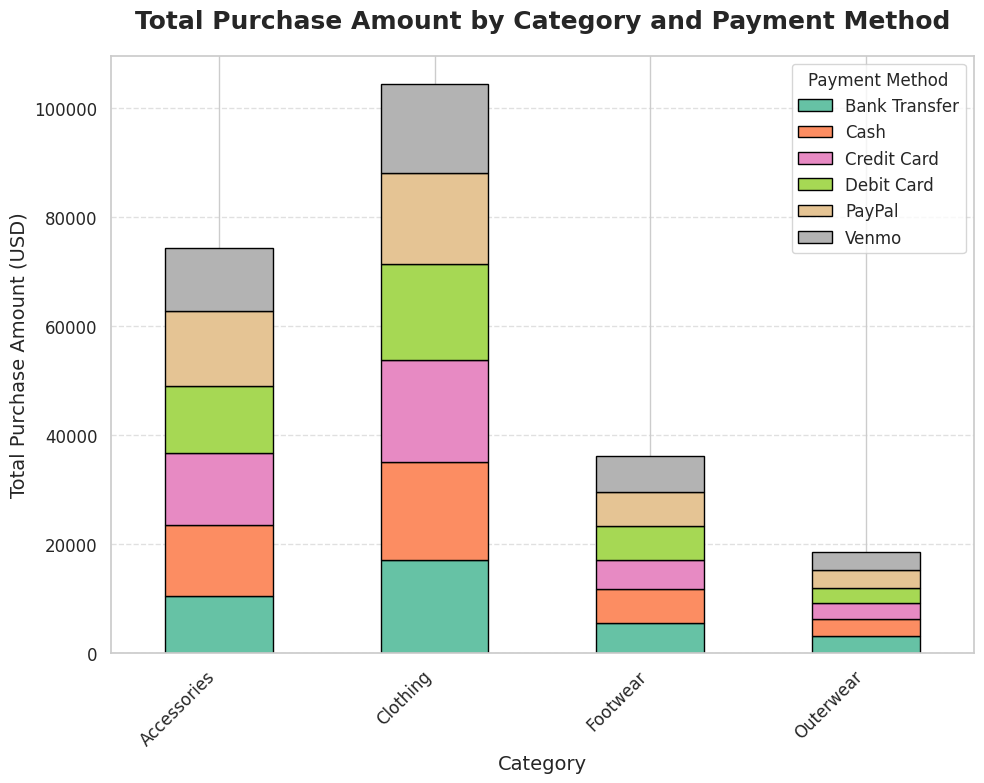

In [78]:
sns.set(style="whitegrid")


# Group by 'Category' and 'Payment Method', and sum the 'Purchase Amount (USD)'
purchase_by_category_payment = shopping_trends.groupby(['Category', 'Payment Method'], observed=False)['Purchase Amount (USD)'].sum().unstack()

# Plot with customized colors and styling
purchase_by_category_payment.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='Set2', edgecolor='black')

# Add title and labels with improved formatting
plt.title('Total Purchase Amount by Category and Payment Method', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Purchase Amount (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Payment Method', fontsize=12, loc='upper right')

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Adjust layout to prevent overlap and improve spacing
plt.tight_layout()

# Show the plot
plt.show()

- This stacked bar chart visualizes the total purchase amount by category and payment method. Each bar represents a product category, with the total purchase amount split by the different payment methods used, including Bank Transfer, Cash, Credit Card, Debit Card, PayPal, and Venmo.
- The colors in the bars distinguish between these payment methods. The chart shows that Clothing has the highest total purchase amount, with a significant portion paid via Debit Card and Credit Card, while categories like Footwear and Outerwear have comparatively lower totals.
- The legend on the right clarifies which color corresponds to each payment method.

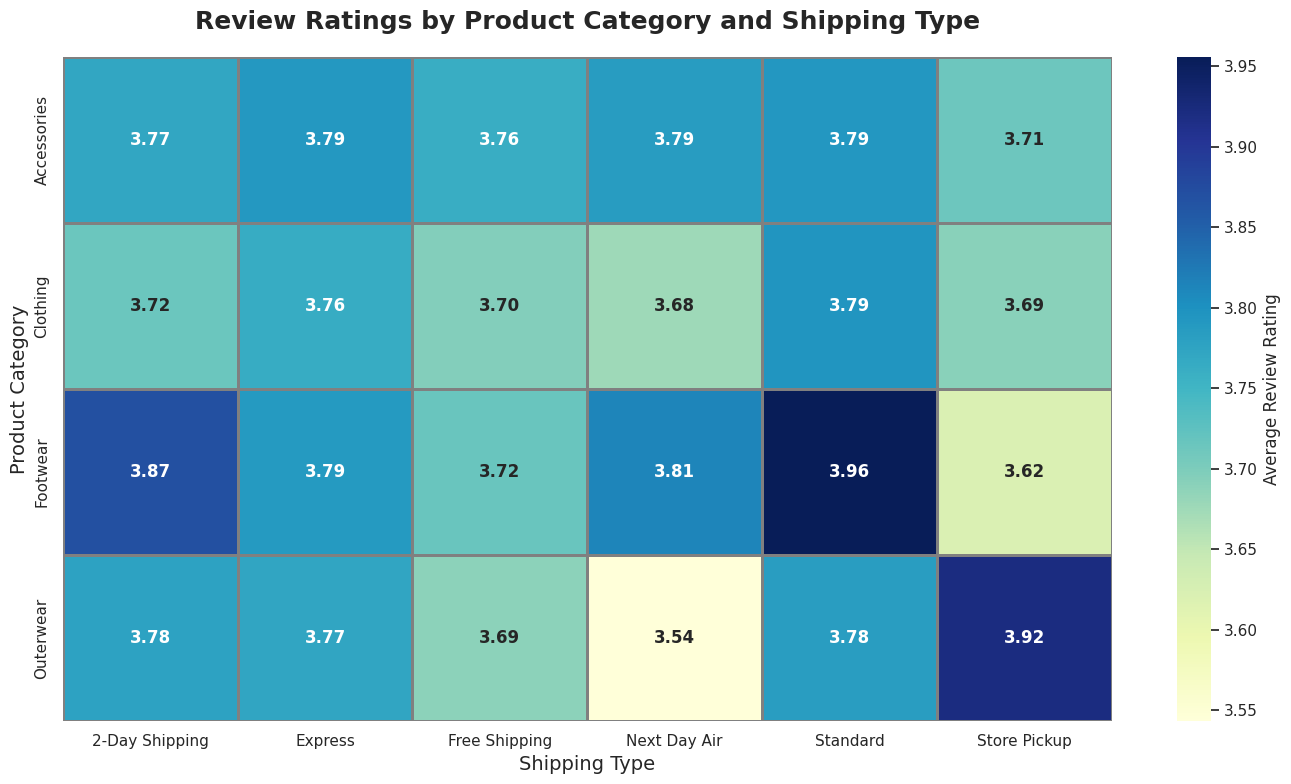

In [79]:
avg_review_by_category_shipping = shopping_trends.groupby(['Category', 'Shipping Type'], observed=False)['Review Rating'].mean().unstack()

# Create the heatmap with customized colors and annotations
plt.figure(figsize=(14, 8))

sns.heatmap(
    avg_review_by_category_shipping,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',  # Changed to a more visually appealing color palette
    cbar_kws={'label': 'Average Review Rating'},
    linewidths=1,  # Add separation between cells for better readability
    linecolor='gray',  # Color of the lines between cells
    annot_kws={'size': 12, 'weight': 'bold'}  # Customize font size and weight for annotations
)

# Adding title and labels with improved formatting
plt.title('Review Ratings by Product Category and Shipping Type', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Shipping Type', fontsize=14)
plt.ylabel('Product Category', fontsize=14)


# Adding gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Adjust the layout to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()


- This heatmap visualizes average review ratings for different product categories and shipping types.
- Each cell represents the average review rating for a specific combination of product category (Accessories, Clothing, Footwear, and Outerwear) and shipping type (2-Day Shipping, Express, Free Shipping, Next Day Air, Standard, and Store Pickup).
- The color gradient reflects the average ratings, with darker shades indicating higher ratings and lighter shades indicating lower ratings. For example, Footwear with Next Day Air has the highest average review rating of 3.96, while Outerwear with Free Shipping has the lowest at 3.54.
- This heatmap provides an easy way to compare how different shipping methods influence customer satisfaction across various product categories.



In [80]:
# Grouping by 'Location' and calculating the average of 'Age', 'Purchase Amount (USD)', and 'Previous Purchases'
shopping_trends_final = shopping_trends.groupby('Location').agg({
    'Age': 'mean',
    'Purchase Amount (USD)': 'mean',
    'Previous Purchases': 'mean'
}).reset_index()

shopping_trends_final.head()

,Location,Age,Purchase Amount (USD),Previous Purchases
0,Alabama,44.314607,59.112360,27.449438
1,Alaska,43.000000,67.597222,28.097222
2,Arizona,45.276923,66.553846,28.369231
3,Arkansas,44.101266,61.113924,27.063291
4,California,42.663158,59.000000,24.494737


In [81]:
shopping_trends_final = shopping_trends_final.rename(columns={'Location': 'State'})

In [82]:
shopping_trends_final.head()

,State,Age,Purchase Amount (USD),Previous Purchases
0,Alabama,44.314607,59.112360,27.449438
1,Alaska,43.000000,67.597222,28.097222
2,Arizona,45.276923,66.553846,28.369231
3,Arkansas,44.101266,61.113924,27.063291
4,California,42.663158,59.000000,24.494737


Merge shopping_trends_final and Income_by_states to to combine the average purchase behavior data (age, purchase amount, previous purchases) from the shopping trends dataset with income-related information

In [83]:
# Merge the two datasets on the 'State' column
merged_data = pd.merge(shopping_trends_final, Income_by_states, how='inner', on='State')


# Show the first few rows of the merged dataset
merged_data.head()

,State,Age,Purchase Amount (USD),Previous Purchases,FIPS,Value (Dollars),Rank within US (of 52 states)
0,Alabama,44.314607,59.112360,27.449438,1000,"59,609",46
1,Alaska,43.000000,67.597222,28.097222,2900,"86,370",13
2,Arizona,45.276923,66.553846,28.369231,4000,"72,581",24
3,Arkansas,44.101266,61.113924,27.063291,5000,"56,335",49
4,California,42.663158,59.000000,24.494737,6000,"91,905",6


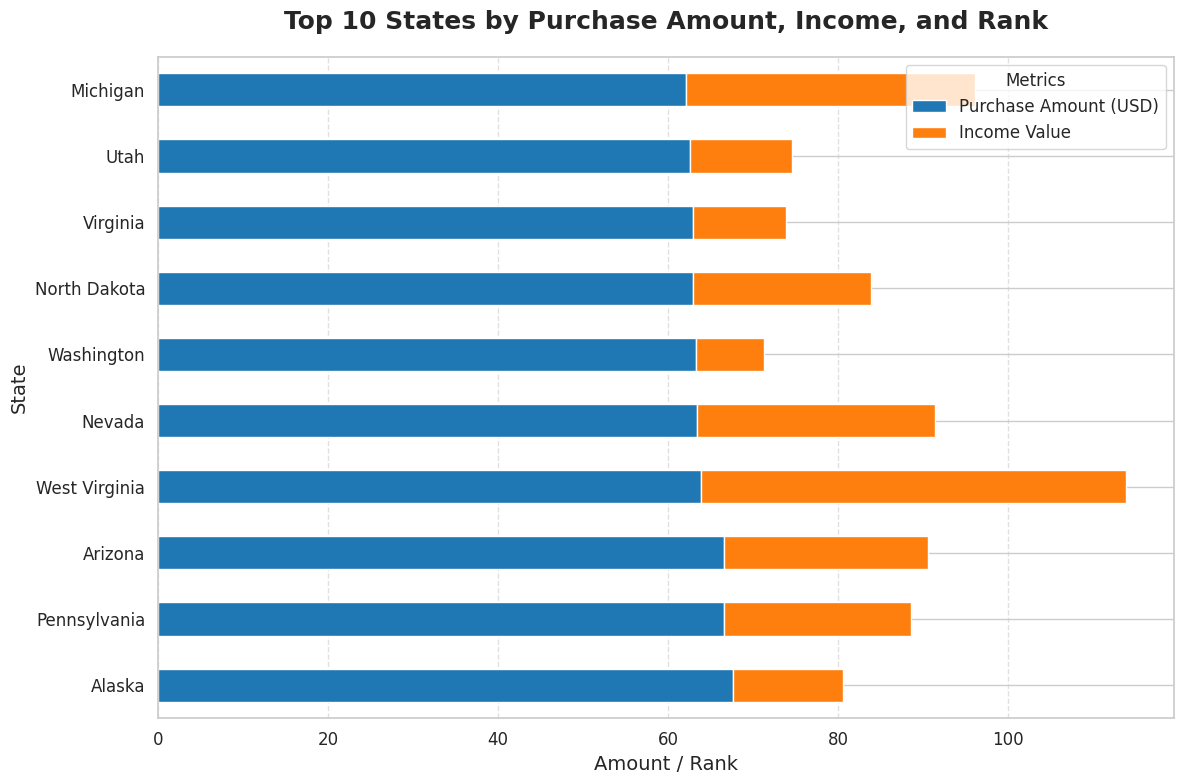

In [84]:
# Sort the merged data by 'Purchase Amount (USD)' and select the top 10 states
top_10_states = merged_data.sort_values(by='Purchase Amount (USD)', ascending=False).head(10)

# Plotting the Stacked Bar Chart for Purchase Amount, Income, and Rank
top_10_states.set_index('State')[['Purchase Amount (USD)', 'Value (Dollars)', 'Rank within US (of 52 states)']].plot(kind='barh', stacked=True, figsize=(12, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Adding title and labels with improved formatting
plt.title('Top 10 States by Purchase Amount, Income, and Rank', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Amount / Rank', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Metrics', labels=['Purchase Amount (USD)', 'Income Value', 'Rank'], loc='upper right', fontsize=12)

# Adding gridlines for better readability
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Adding some padding to the layout to avoid congestion
plt.tight_layout()

# Display the chart
plt.show()

- This bar chart visualizes the Top 10 States by Purchase Amount (USD) and Income Value (Dollars).
- The blue bars represent the Purchase Amount (USD), while the orange bars correspond to the Income Value of each state. The chart allows us to compare the purchasing behavior of these states against their income levels, highlighting which states spend more relative to their income.
-  From the chart, it's clear that some states with higher income (such as Michigan and Virginia) also show significant purchase amounts, suggesting a correlation between wealth and spending.
- The legend on the right differentiates between the two metrics for easy comparison.

In [86]:
geojson_df = pd.json_normalize(geojson['features'])

merged_data = pd.merge(geojson_df, shopping_trends_final, left_on='properties.name', right_on='State', how='left')

# Create the choropleth map
fig = px.choropleth(merged_data,
                    geojson=geojson,
                    locations='properties.name',
                    color='Purchase Amount (USD)',
                    featureidkey="properties.name",
                    hover_name='properties.name',
                    hover_data=['Purchase Amount (USD)'],
                    color_continuous_scale="bluered")

fig.update_geos(fitbounds="locations", visible=False)

# Show the map
fig.show()

- This choropleth map visualizes the purchase amount (USD) across different states in the United States.

- States are color-coded based on the average purchase amount, with the darkest red areas indicating the highest values and the blue areas showing the lowest.  

- The map allows for quick geographic analysis of purchasing patterns across the country, highlighting regions with varying consumer spending behavior.

# **Conclusion**

- In conclusion, this project not only sheds light on the complex relationship between customer demographics, purchase patterns, and payment methods but also incorporates geographical and seasonal influences that impact consumer decisions.

- By merging multiple datasets and visualizing them spatially, I have created a holistic view of shopping trends across the US.

- The insights derived from this project have the potential to guide businesses in tailoring their marketing efforts, optimizing product offerings, and better understanding the diverse needs of their customers based on geographic and demographic segmentation.